### Decision Tree

In [1]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
#from sklearn.datasets import make_blobs

#X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0), 

<ipython-input-5-4785a1f288bc>:6: RuntimeWarning: divide by zero encountered in log2
  plt.plot(x, [-x*np.log2(x) - (1-x) * np.log2(1-x) for x in x], label='Entropy')
<ipython-input-5-4785a1f288bc>:6: RuntimeWarning: invalid value encountered in double_scalars
  plt.plot(x, [-x*np.log2(x) - (1-x) * np.log2(1-x) for x in x], label='Entropy')


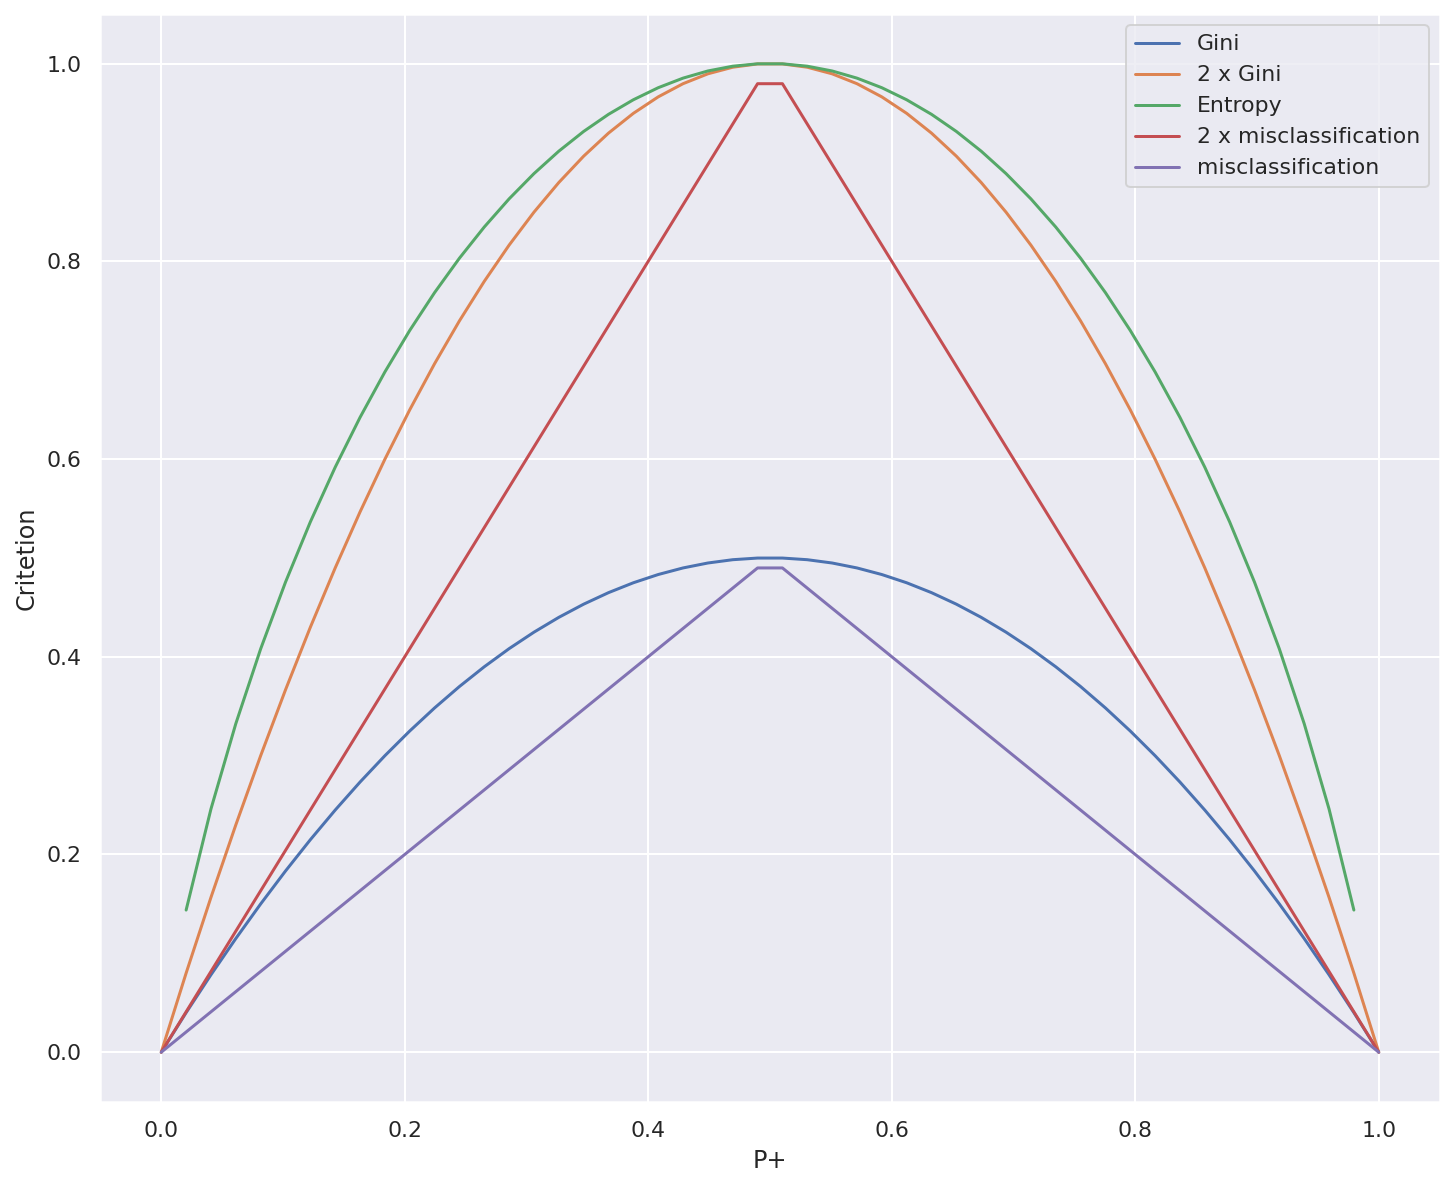

In [5]:
plt.figure (figsize=(12,10))
x = np.linspace(0,1,50)

plt.plot(x, [2*x*(1-x) for x in x], label='Gini')
plt.plot(x, [4*x*(1-x) for x in x], label='2 x Gini')
plt.plot(x, [-x*np.log2(x) - (1-x) * np.log2(1-x) for x in x], label='Entropy')

plt.plot(x, [2-2*max(x,1-x) for x in x], label='2 x misclassification')
plt.plot(x, [1-max(x,1-x) for x in x], label='misclassification')

plt.xlabel('P+')
plt.ylabel('Critetion')
plt.legend()
plt.show();

#### Example 2 

In [8]:
np.random.seed(17)
train_data = np.random.normal(size=(100,2))
train_labels = np.zeros(100)


In [9]:

#adding second class
train_data = np.r_[train_data, np.random.normal(size=(100,2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]


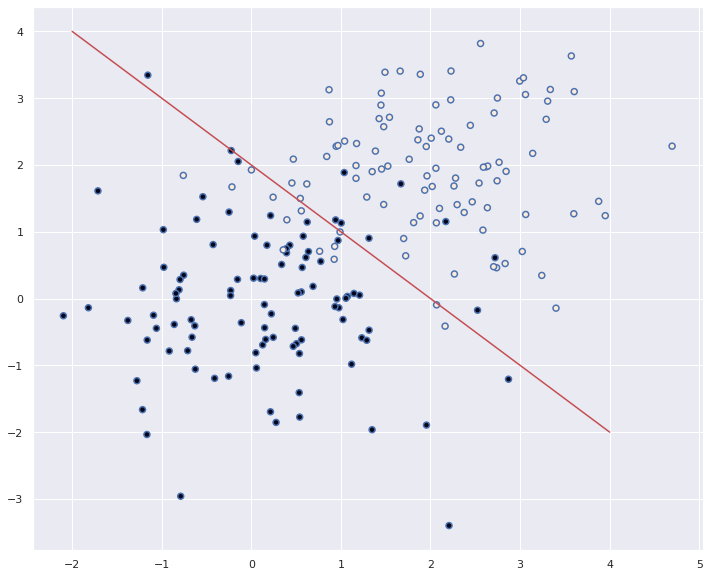

In [10]:
plt.figure(figsize=(12,10))

plt.scatter(train_data[:,0],train_data[:,1], c=train_labels, edgecolors='b', lw=1.5)
plt.plot(range (-2,5), range(4,-3,-1), c='r');

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
def get_grid(data):
    x_min, x_max = data[:,0].min() - 1, data[:,0].max() + 1
    y_min, y_max = data[:,1].min() - 1, data[:,1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [13]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# trianing phase 
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

In [14]:
xx, yy = get_grid(train_data)
predict = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

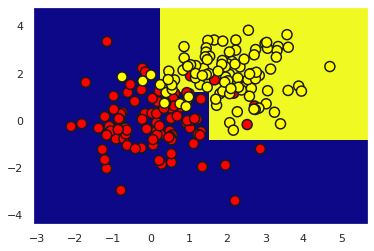

In [15]:
plt.pcolormesh(xx,yy,predict, cmap=plt.cm.plasma)
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, s=100, 
            cmap=plt.cm.autumn, lw=1.5, edgecolors='k')
plt.show();

In [16]:
# pip install pydotplus
import pydotplus
from sklearn.tree import export_graphviz

In [17]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                              filled=True, out_file=None, rounded=True)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [18]:
tree_graph_to_png(tree=clf_tree, feature_names=['x1','x2'], 
                  png_file_to_save='./dec_tree.png')

<img src='dec_tree.png' />

<img src='dec_tree.png', width=100>

#### Example 3

In [23]:
from sklearn.datasets import load_iris, load_boston
from six import StringIO

import pydot
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

boston = load_boston()
iris = load_iris()

In [27]:
reg = DecisionTreeRegressor(max_leaf_nodes=5)
reg.fit(boston.data, boston.target)
dot_data = StringIO()
export_graphviz(reg, out_file='./boston-tree.dot', feature_names=boston.feature_names)

<img src='btree.png'>

In [28]:
#!dot -Tpng boston-tree.dot -o btree.png

#### Gini Index 

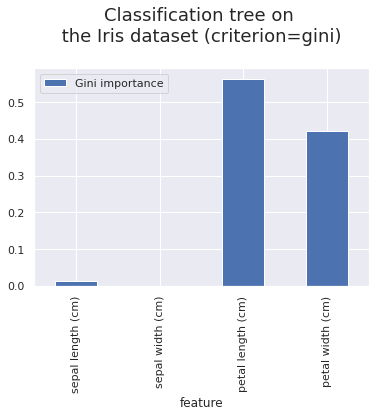

In [48]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best')
est = clf.fit(iris.data, iris.target)
zip(iris.feature_names, clf.feature_importances_)
plt = pd.DataFrame(zip(iris.feature_names, clf.feature_importances_), 
                  columns=['feature', 'Gini importance']).plot(kind='bar', x='feature')

_ = plt.set_title('Classification tree on \n the Iris dataset (criterion=gini) \n', fontsize=18)

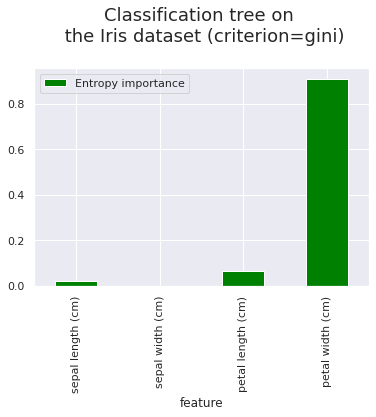

In [47]:
# entropy

clf_entropy = DecisionTreeClassifier(criterion='entropy', splitter='best')
est = clf_entropy.fit(iris.data, iris.target)
zip(iris.feature_names, clf_entropy.feature_importances_)
plt = pd.DataFrame(zip(iris.feature_names, clf_entropy.feature_importances_), 
                  columns=['feature', 'Entropy importance']).plot(kind='bar', x='feature', 
                                                               color='green')

_ = plt.set_title('Classification tree on \n the Iris dataset (criterion=gini)\n', fontsize=18)